Import packages.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale

%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('./final_result_impl_matrixmul_int.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

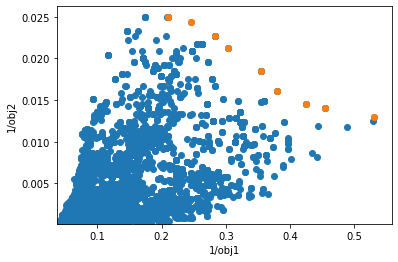

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.0


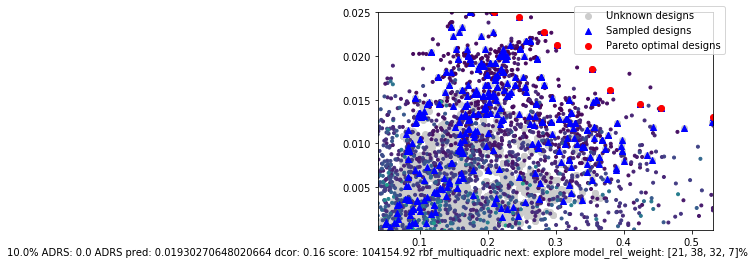

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.1),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([1859, 2197, 2712, 2013, 4576, 1223, 1227, 1283,  224,  284,   12,
        538,   48,  164, 2675, 2826, 2477,  226,  167,  474,  236,  228,
        232,   32, 4437,  170,  173,  478,  233,   52,   56, 2871, 2711,
       1303, 2709,  791,  482, 2987, 2650, 2649,  787, 2708, 2882, 2827,
       1104,  486, 5195,  662,  248, 4434,  264,  803,  240,  288,  244,
        292,  353,  304,  602,  296, 2697,  352, 2698,   60,  975, 1039,
       4034, 2758, 1888,  300,  316,  252,  915,  723, 1162,  851, 1344,
       1463,  422,  291,  303,  299,  295,  289,  290, 3716,  852, 2639,
        294,  298,  302,  301,  297,  293,  977,  978,  542,  726,  976,
        165,  666,  413,  362,  605,  307,  980, 3193, 1042, 1041, 1103,
        993, 1102, 1405, 1165,  790, 1779, 2356, 1778, 1107,  477, 1777,
       2354, 3766, 1040, 3191, 2696, 2355,   51, 1776, 1720, 2637, 2353,
       2973,   63,  364, 3713,  481,   59, 1571, 1610,   55,  360,   58,
       3087, 1619,   50,  359,  734, 1609,   62, 15